<a href="https://colab.research.google.com/github/IlonaGA/hw_ribo-seq/blob/main/HW_Ribo_seq_wig.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:20
🔁 Restarting kernel...


In [1]:
!pip install gffpandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.8/178.8 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for gffpandas: filename=gffpandas-1.2.0-py2.py3-none-any.whl size=6248 sha256=e1ca59c438326641a5a79515cd113e27583b219d7a035aa61331e13d9b29ce3d
  Stored in directory: /root/.cache/pip/wheels/72/1f/d9/720b46dd9a4a33d141caabe4b65843eeef62cd20037cb6953d
Successfully built gffpandas


In [2]:
!conda install -c bioconda bedtools

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - bedtools


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    bedtools-2.30.0            |       h468198e_3        15.5 MB  bioconda
    ca-certificates-2022.12.7  |       ha878542_0         143 KB  conda-forge
    certifi-2022.12.7          |     pyhd8ed1ab_0         147 KB  conda-forge
    colorama-0.4.6             |     pyhd8ed1ab_0          25 KB  conda-forge
    conda-22.11.1              |   py38h578d9bd_1         905 KB  conda-forge
    pluggy-1.0.0               |     pyhd8ed1ab_5          16 KB  conda-forge
    ruamel.yaml-0.17.21        |   py38h0a891b7_2         172 KB  conda-forge
    ruamel.yaml.clib-0.2.7     |   py38h1de0b5d_1         143 KB  conda-forge
    tqdm-4.64.1                |     p

In [77]:
import pandas as pd 
import gffpandas.gffpandas as gffpd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [78]:
annot_df = gffpd.read_gff3('GCF_000005845.2_ASM584v2_genomic.gff').df
annot_df.head()

,seq_id,source,type,start,end,score,strand,phase,attributes
0,NC_000913.3,RefSeq,region,1,4641652,.,+,.,ID=NC_000913.3:1..4641652;Dbxref=taxon:511145;...
1,NC_000913.3,RefSeq,gene,190,255,.,+,.,"ID=gene-b0001;Dbxref=ASAP:ABE-0000006,ECOCYC:E..."
2,NC_000913.3,RefSeq,CDS,190,255,.,+,0,ID=cds-NP_414542.1;Parent=gene-b0001;Dbxref=Un...
3,NC_000913.3,RefSeq,gene,337,2799,.,+,.,"ID=gene-b0002;Dbxref=ASAP:ABE-0000008,ECOCYC:E..."
4,NC_000913.3,RefSeq,CDS,337,2799,.,+,0,ID=cds-NP_414543.1;Parent=gene-b0002;Dbxref=Un...


In [79]:
def get_gene(attribute):
  l = attribute.split('gene=')
  if len(l) > 1:
    return l[1].split(';')[0]
  else:
    None

annot_df['gene'] = annot_df['attributes'].apply(get_gene)
annot_df[annot_df['gene'].apply(lambda x: str(x)[:3]) == 'atp']

,seq_id,source,type,start,end,score,strand,phase,attributes,gene
8036,NC_000913.3,RefSeq,gene,3915553,3915972,.,-,.,"ID=gene-b3731;Dbxref=ASAP:ABE-0012206,ECOCYC:E...",atpC
8037,NC_000913.3,RefSeq,CDS,3915553,3915972,.,-,0,ID=cds-NP_418187.1;Parent=gene-b3731;Dbxref=Un...,atpC
8038,NC_000913.3,RefSeq,gene,3915993,3917375,.,-,.,"ID=gene-b3732;Dbxref=ASAP:ABE-0012208,ECOCYC:E...",atpD
8039,NC_000913.3,RefSeq,CDS,3915993,3917375,.,-,0,ID=cds-NP_418188.1;Parent=gene-b3732;Dbxref=Un...,atpD
8040,NC_000913.3,RefSeq,gene,3917402,3918265,.,-,.,"ID=gene-b3733;Dbxref=ASAP:ABE-0012211,ECOCYC:E...",atpG
8041,NC_000913.3,RefSeq,CDS,3917402,3918265,.,-,0,ID=cds-NP_418189.1;Parent=gene-b3733;Dbxref=Un...,atpG
8042,NC_000913.3,RefSeq,gene,3918316,3919857,.,-,.,"ID=gene-b3734;Dbxref=ASAP:ABE-0012213,ECOCYC:E...",atpA
8043,NC_000913.3,RefSeq,CDS,3918316,3919857,.,-,0,ID=cds-NP_418190.1;Parent=gene-b3734;Dbxref=Un...,atpA
8044,NC_000913.3,RefSeq,gene,3919870,3920403,.,-,.,"ID=gene-b3735;Dbxref=ASAP:ABE-0012215,ECOCYC:E...",atpH
8045,NC_000913.3,RefSeq,CDS,3919870,3920403,.,-,0,ID=cds-NP_418191.1;Parent=gene-b3735;Dbxref=Un...,atpH


In [80]:
wig_df = pd.concat([
    pd.read_csv('02. RiboSeq_EColi_track_f.wig', sep='\t', names=['position', 'number'], header=1),
    pd.read_csv('02. RiboSeq_EColi_track_r.wig', sep='\t', names=['position', 'number'], header=1),
])
wig_df.head()

,position,number
0,77,2
1,85,1
2,139,1
3,147,1
4,153,1


In [81]:
annot_df['length'] = annot_df['end'] - annot_df['start']
annot_df.sort_values(by='length', ascending=False, inplace=True)
annot_df[annot_df['type'] == 'gene'].head()

,seq_id,source,type,start,end,score,strand,phase,attributes,gene,length
4289,NC_000913.3,RefSeq,gene,2044938,2052014,.,+,.,"ID=gene-b1978;Dbxref=ASAP:ABE-0006563,ECOCYC:G...",yeeJ,7076
5445,NC_000913.3,RefSeq,gene,2647326,2652287,.,-,.,"ID=gene-b2520;Dbxref=ASAP:ABE-0008296,ECOCYC:G...",yfhM,4961
3592,NC_000913.3,RefSeq,gene,1729087,1733703,.,+,.,"ID=gene-b1653;Dbxref=ASAP:ABE-0005525,ECOCYC:E...",lhr,4616
5731,NC_000913.3,RefSeq,gene,2778146,2782726,.,-,.,"ID=gene-b2647;Dbxref=ASAP:ABE-0008713,ECOCYC:G...",ypjA,4580
6405,NC_000913.3,RefSeq,gene,3114550,3119112,.,-,.,"ID=gene-b4466;Dbxref=ASAP:ABE-0174096,ECOCYC:G...",yghJ,4562


In [82]:
start, end = annot_df.loc[annot_df['type'] == 'gene', ['start', 'end']].iloc[0]
start, end

(2044938, 2052014)

In [83]:
wig_df['3_res'] = wig_df['position'] % 3
wig_gene = wig_df[(wig_df['position'] >= start) & (wig_df['position'] <= end)]


### Покрытие гена:

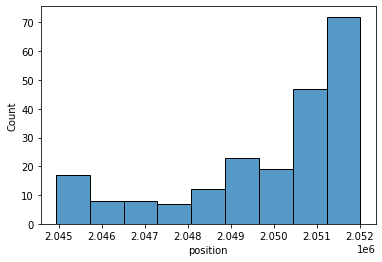

In [84]:
sns.histplot(wig_gene['position'])
plt.show()

Видно что ген покрыт неравномерно, причем больше каунтов попадает на его конец

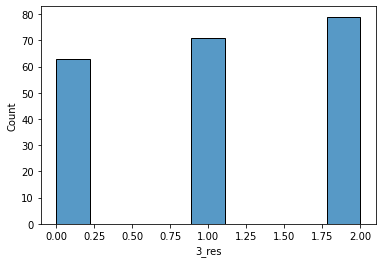

In [85]:
sns.histplot(wig_gene['3_res'])
plt.show()

Периодичность не сильно заметна

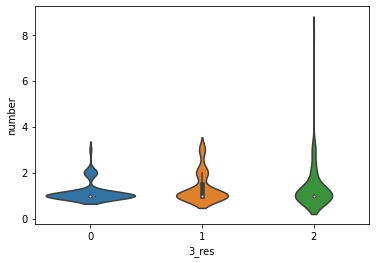

In [86]:
sns.violinplot(data=wig_gene, x='3_res', y='number')
plt.show()

In [87]:
wig_gene.groupby('3_res')['number'].value_counts()

3_res  number
0      1         54
       2          8
       3          1
1      1         53
       2         12
       3          6
2      1         63
       2          9
       3          6
       8          1
Name: number, dtype: int64

В этом гене присутсвует небольшой сдвиг в на координаты с остатком 2  
0 и 1 распределены примерно одинаково  
Посмотрим аналогичный график по всем генам относительно их начала:

In [88]:
wig_df['chr'] = 1
wig_df['position_end'] = wig_df['position']
wig_df[['chr', 'position', 'position_end', 'number']].to_csv('wig.bed', sep='\t', index=None, header=False)

annot_df['chr'] = 1
annot_df.loc[(annot_df['type'] == 'gene'), ['chr', 'start', 'end']].to_csv('annot.bed', sep='\t', index=None, header=False)

In [89]:
!bedtools intersect -wo -a wig.bed -b annot.bed > wig_gene.bed
!head wig_gene.bed
!cat wig_gene.bed | cut -f 2,4,6,7 > gene_intersect.wig
!head gene_intersect.wig

1	191	191	21	1	190	255	0
1	192	192	4	1	190	255	0
1	193	193	3	1	190	255	0
1	194	194	25	1	190	255	0
1	195	195	6	1	190	255	0
1	197	197	1	1	190	255	0
1	200	200	12	1	190	255	0
1	201	201	11	1	190	255	0
1	202	202	14	1	190	255	0
1	203	203	14	1	190	255	0
191	21	190	255
192	4	190	255
193	3	190	255
194	25	190	255
195	6	190	255
197	1	190	255
200	12	190	255
201	11	190	255
202	14	190	255
203	14	190	255


In [90]:
wig_df = pd.read_csv('gene_intersect.wig', sep='\t', names=['position', 'number', 'gene_start', 'gene_end'])
wig_df['position_from_start'] = wig_df['position'] - wig_df['gene_start']
wig_df['3_res'] = wig_df['position_from_start'] % 3

In [91]:
for start, end in atp_df[['start', 'end']].values:
  if len(wig_df[wig_df['position'].between(start, end)]) > 0:
    print(start, end)
    print(wig_df[wig_df['position'].between(start, end)])

3918316 3919857
         position  number  gene_start  gene_end  position_from_start  3_res
454007    3918559       2     3918316   3919857                  243      0
1105643   3918316       2     3918316   3919857                    0      0
1105644   3918317       3     3918316   3919857                    1      1
1105645   3918318       1     3918316   3919857                    2      2
1105646   3918319       2     3918316   3919857                    3      0
...           ...     ...         ...       ...                  ...    ...
1107097   3919853       7     3918316   3919857                 1537      1
1107098   3919854     238     3918316   3919857                 1538      2
1107099   3919855      72     3918316   3919857                 1539      0
1107100   3919856       9     3918316   3919857                 1540      1
1107101   3919857       6     3918316   3919857                 1541      2

[1460 rows x 6 columns]
3915993 3917375
         position  number  gene

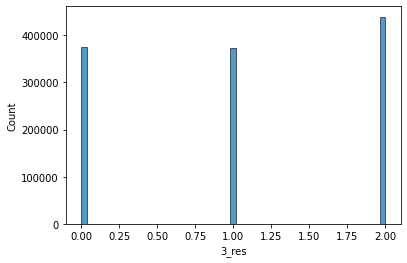

In [92]:
sns.histplot(wig_df['3_res'])
plt.show()

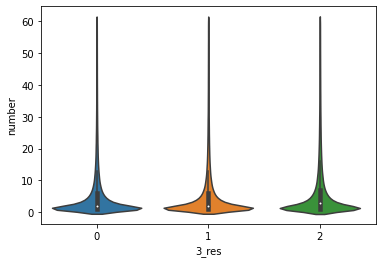

In [93]:
quantile = np.quantile(wig_df['number'], 0.95)
sns.violinplot(data=wig_df[wig_df['number'] < quantile], x='3_res', y='number')
plt.show()

In [94]:
wig_df.groupby('3_res')['number'].max()

3_res
0    3282700
1    3294154
2     562248
Name: number, dtype: int64

### RPKM и TPM для каждого гена

In [95]:
gene_stats = wig_df.groupby(['gene_start', 'gene_end'])['number'].sum().reset_index()

In [96]:
total_reads = gene_stats['number'].sum()
gene_stats['RPKM'] = 1e9 * gene_stats['number'] / total_reads / (gene_stats['gene_end'] - gene_stats['gene_start'] + 1)

total_reads_per_length = (gene_stats['number'] / (gene_stats['gene_end'] - gene_stats['gene_start'] + 1)).sum()
gene_stats['TPM'] = 1e6 * gene_stats['number'] / (gene_stats['gene_end'] - gene_stats['gene_start'] + 1) / total_reads_per_length
gene_stats.rename(columns={'gene_start':'start', 'gene_end':'end'}, inplace=True)
gene_stats.head()

,start,end,number,RPKM,TPM
0,190,255,811,208.081136,126.253658
1,337,2799,34300,235.822641,143.085874
2,2801,3733,6706,121.713205,73.849738
3,3734,5020,19619,258.139290,156.626547
4,5234,5530,160,9.122615,5.535165


### Оперон ATP

In [99]:
atp_df = annot_df[annot_df['gene'].apply(lambda x: str(x)[:3]) == 'atp']
atp_df = atp_df[atp_df['type'] == 'gene']
atp_df.merge(gene_stats, on=['start', 'end'])

,seq_id,source,type,start,end,score,strand,phase,attributes,gene,length,chr,number,RPKM,TPM
0,NC_000913.3,RefSeq,gene,3918316,3919857,.,-,.,"ID=gene-b3734;Dbxref=ASAP:ABE-0012213,ECOCYC:E...",atpA,1541,1,73134,803.139055,487.306277
1,NC_000913.3,RefSeq,gene,3915993,3917375,.,-,.,"ID=gene-b3732;Dbxref=ASAP:ABE-0012208,ECOCYC:E...",atpD,1382,1,84139,1030.222326,625.089521
2,NC_000913.3,RefSeq,gene,3917402,3918265,.,-,.,"ID=gene-b3733;Dbxref=ASAP:ABE-0012211,ECOCYC:E...",atpG,863,1,12618,247.304815,150.052706
3,NC_000913.3,RefSeq,gene,3921236,3922051,.,-,.,"ID=gene-b3738;Dbxref=ASAP:ABE-0012222,ECOCYC:E...",atpB,815,1,22903,475.289266,288.382742
4,NC_000913.3,RefSeq,gene,3919870,3920403,.,-,.,"ID=gene-b3735;Dbxref=ASAP:ABE-0012215,ECOCYC:E...",atpH,533,1,9441,299.386720,181.653510
5,NC_000913.3,RefSeq,gene,3920418,3920888,.,-,.,"ID=gene-b3736;Dbxref=ASAP:ABE-0012217,ECOCYC:E...",atpF,470,1,12632,454.158034,275.561324
6,NC_000913.3,RefSeq,gene,3915553,3915972,.,-,.,"ID=gene-b3731;Dbxref=ASAP:ABE-0012206,ECOCYC:E...",atpC,419,1,11576,466.729250,283.188935
7,NC_000913.3,RefSeq,gene,3922060,3922440,.,-,.,"ID=gene-b3739;Dbxref=ASAP:ABE-0012224,ECOCYC:E...",atpI,380,1,511,22.711808,13.780437
8,NC_000913.3,RefSeq,gene,3920950,3921189,.,-,.,"ID=gene-b3737;Dbxref=ASAP:ABE-0012220,ECOCYC:E...",atpE,239,1,71395,5037.468549,3056.494428


Таких генов 9 штук, координаты 3915553-3922440



Наибольшее покрытие имеют гены, кодирующие $\alpha$ и $\beta$ субъединицы, которых в АТФ синтазе по 3 штуки. Наименьшее - гены, кодирующие $\gamma$, $\delta$, которых по 1 штуке. Ген aptE кодирует роток $c$, его экспрессия также нужна в большом количестве (12 субъединиц).

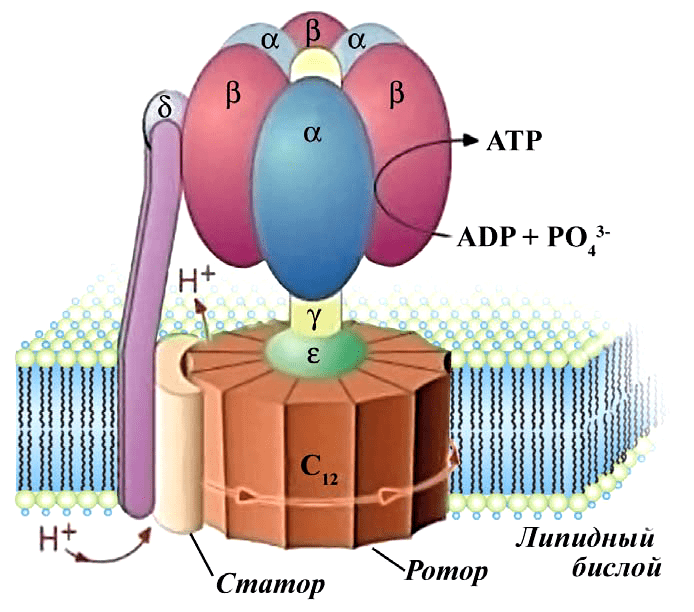

В случае RNA-Seq, думаю, разница тоже будет заметна, но, возможно, будет не такая сильная. Так как Ribo-Seq оценивает именно трансляцию.